In [3]:
import numpy as np

In [4]:
import pandas as pd

In [5]:
import matplotlib.pyplot as plt

In [6]:
import seaborn as sns

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [10]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [11]:
from sklearn.datasets import fetch_california_housing

In [12]:
# Load the California Housing dataset
california_housing = fetch_california_housing()

In [13]:
# Create a DataFrame
data = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
data['PRICE'] = california_housing.target

In [14]:
# Display the first few rows of the dataset
print("California Housing Dataset:")
print(data.head())

California Housing Dataset:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  PRICE  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  


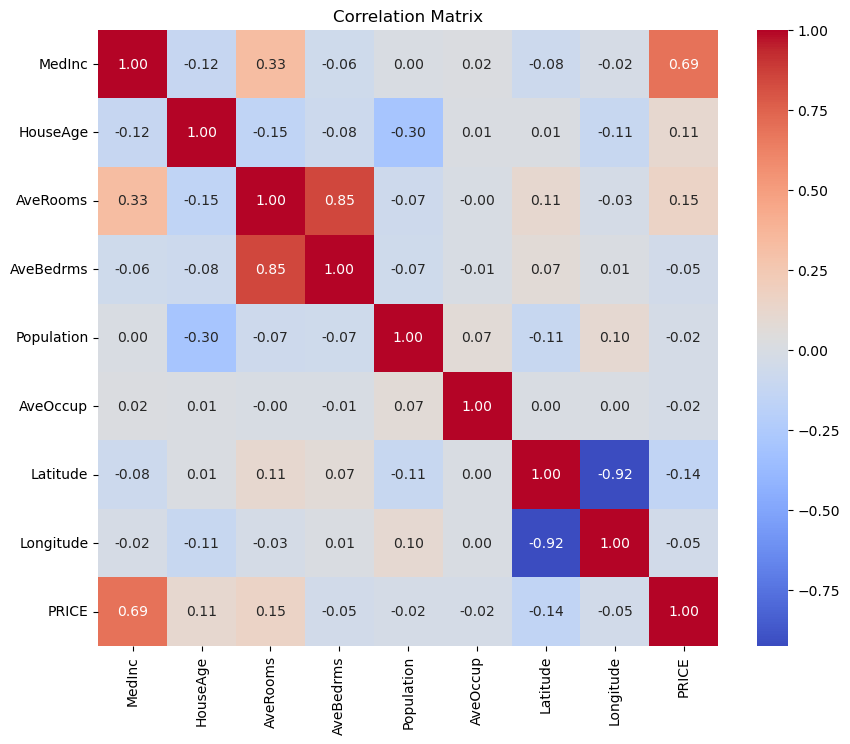

In [15]:
# Visualize the correlation matrix
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [16]:
# Feature Selection
selected_features = ['MedInc', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
X = data[selected_features].values
y = data['PRICE'].values

In [17]:
# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [18]:
# Polynomial Features
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_scaled)

In [19]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

In [20]:
# Train the Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [21]:
# Make Predictions
y_pred = model.predict(X_test)

In [22]:
# Evaluate the Model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
adj_r2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)

In [23]:
print("\nModel Evaluation:")
print(f'Mean Squared Error: {mse:.2f}')
print(f'Mean Absolute Error: {mae:.2f}')
print(f'R2 Score: {r2:.2f}')
print(f'Adjusted R2 Score: {adj_r2:.2f}')


Model Evaluation:
Mean Squared Error: 0.46
Mean Absolute Error: 0.48
R2 Score: 0.65
Adjusted R2 Score: 0.64


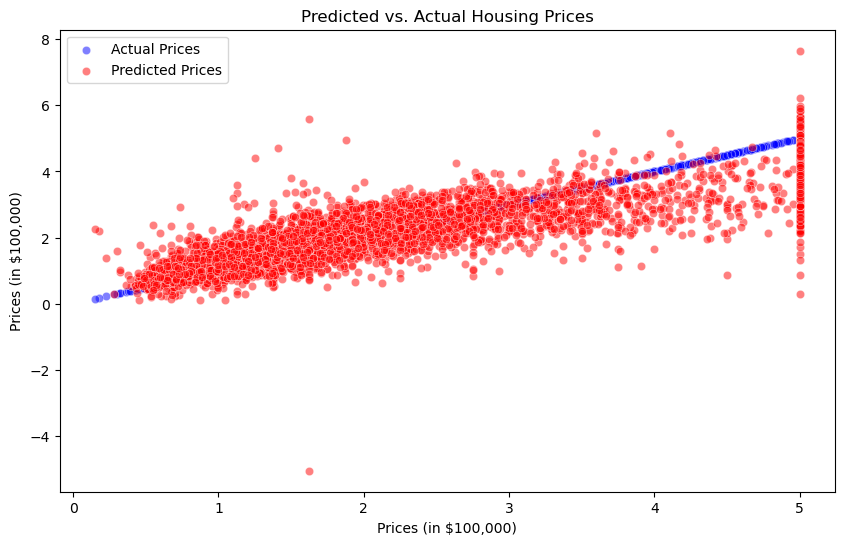

In [24]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_test, color='blue', label='Actual Prices', alpha=0.5)
sns.scatterplot(x=y_test, y=y_pred, color='red', label='Predicted Prices', alpha=0.5)
plt.title('Predicted vs. Actual Housing Prices')
plt.xlabel('Prices (in $100,000)')
plt.ylabel('Prices (in $100,000)')
plt.legend()
plt.show()